####Step.5.2: Customer Segmentation

Segmenting Customers by Frequency and Spend: The code segments customers based on their purchase frequency and total spend. It uses quantiles to create "Low," "Medium," and "High" segments.

In [ ]:
!pip install pandas


Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392491 entries, 0 to 392490
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392491 non-null  int64  
 1   StockCode    392491 non-null  object 
 2   Description  392491 non-null  object 
 3   Quantity     392491 non-null  int64  
 4   InvoiceDate  392491 non-null  object 
 5   UnitPrice    392491 non-null  float64
 6   CustomerID   392491 non-null  float64
 7   Country      392491 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.0+ MB
Unique customers: 4335
Unique invoices: 18528


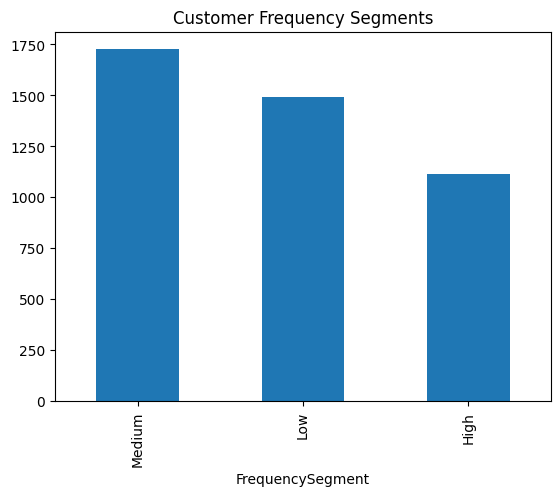

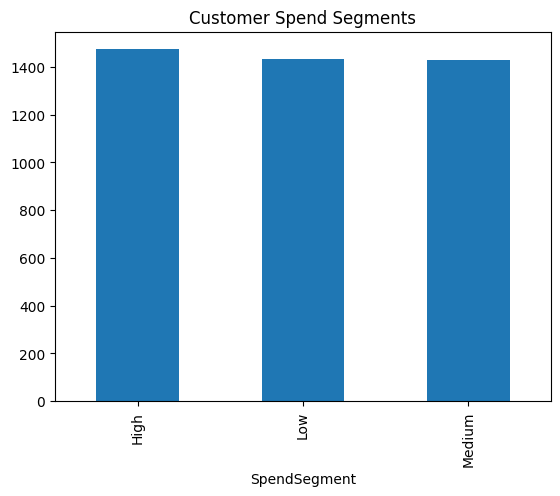

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/final_clean.csv")

# Quick inspection of the dataset
print("Dataset overview:")
df.info()
df.head()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

unique_customers = df['CustomerID'].unique()
unique_invoices = df['InvoiceNo'].unique()

print(f"Unique customers: {len(unique_customers)}")
print(f"Unique invoices: {len(unique_invoices)}")

# Segment customers by purchase frequency
customer_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Define quantiles to create frequency segments
low_cutoff = customer_frequency.quantile(0.33)
high_cutoff = customer_frequency.quantile(0.66)

# Create frequency segments based on cutoffs
df['FrequencySegment'] = df['CustomerID'].map(
    lambda x: 'Low' if customer_frequency[x] <= low_cutoff
    else 'High' if customer_frequency[x] > high_cutoff
    else 'Medium'
)

# Segment customers by total spend
customer_spend = df.groupby('CustomerID')['UnitPrice'].sum()

# Define cutoffs for spend segments
low_spend_cutoff = customer_spend.quantile(0.33)
high_spend_cutoff = customer_spend.quantile(0.66)

# Create spend segments based on cutoffs
df['SpendSegment'] = df['CustomerID'].map(
    lambda x: 'Low' if customer_spend[x] <= low_spend_cutoff
    else 'High' if customer_spend[x] > high_spend_cutoff
    else 'Medium'
)

# Create a new DataFrame with customer segments and additional information
customer_features = pd.DataFrame({
    'CustomerID': df['CustomerID'],
    'FrequencySegment': df['FrequencySegment'],
    'SpendSegment': df['SpendSegment']
}).drop_duplicates()  # Ensure unique entries

# Visualize customer frequency segments
customer_features['FrequencySegment'].value_counts().plot(kind='bar', title='Customer Frequency Segments')
plt.show()

# Visualize customer spend segments
customer_features['SpendSegment'].value_counts().plot(kind='bar', title='Customer Spend Segments')
plt.show()

customer_features.to_csv("customer_segments.csv", index=False)
